# Fly’s Eye Energetic Particle Spectrometer (FEEPS)
author: Louis Richard

Routines :
* feeps_correct_energies
* feeps_flat_field_corrections
* feeps_omni
* feeps_pad
* feeps_pad_spinavg
* feeps_remove_bad_data
* feeps_remove_sun
* feeps_sector_spec
* feeps_spin_avg
* feeps_split_integral_ch
* get_feeps_alle


In [1]:
import matplotlib.pyplot as plt

from pyrfu import mms
from pyrfu.plot import plot_line, plot_spectr

## Define data path, time interval and spacecraft index

In [2]:
db_init("/Volumes/mms")
tint_long = ["2017-07-23T16:10:00", "2017-07-23T18:10:00"]
mms_id = 2

## Load data

### Magnetic field in GSM

In [3]:
b_bcs = mms.get_data("b_bcs_fgm_srvy_l2", tint_long, mms_id)
b_gsm = mms.get_data("b_gsm_fgm_srvy_l2", tint_long, mms_id)

18-Jun-21 21:44:33: Loading mms2_fgm_b_bcs_srvy_l2...
18-Jun-21 21:44:33: Loading mms2_fgm_b_gsm_srvy_l2...


### Electron and ion differential particle flux for all FEEPS sensors

In [4]:
help(mms.get_feeps_alleyes)

Help on function get_feeps_alleyes in module pyrfu.mms.get_feeps_alleyes:

get_feeps_alleyes(tar_var, tint, mms_id, verbose: bool = True, data_path: str = '')
    Read energy spectrum of the selected specie in the selected energy
    range for all FEEPS eyes.
    
    Parameters
    ----------
    tar_var : str
        Key of the target variable like
        {data_unit}{specie}_{data_rate}_{data_lvl}.
    tint : list of str
        Time interval.
    mms_id : int or float or str
        Index of the spacecraft.
    verbose : bool, Optional
        Set to True to follow the loading. Default is True.
    data_path : str, Optional
        Path of MMS data. Default uses `pyrfu.mms.mms_config.py`
    
    Returns
    -------
    out : xarray.Dataset
        Dataset containing the energy spectrum of the available eyes of the
        Fly's Eye Energetic Particle Spectrometer (FEEPS).
    
    Examples
    --------
    >>> from pyrfu import mms
    
    Define time interval
    
    >>> tint_b

In [5]:
# Electron
dpf_feeps_alle_e = mms.get_feeps_alleyes("cpse_srvy_l2", tint_long, mms_id)

# Ion
dpf_feeps_alle_i = mms.get_feeps_alleyes("cpsi_srvy_l2", tint_long, mms_id)

18-Jun-21 21:44:34: Loading mms2_epd_feeps_srvy_l2_electron_spinsectnum...
18-Jun-21 21:44:34: Loading mms2_epd_feeps_srvy_l2_electron_pitch_angle...
18-Jun-21 21:44:34: Loading mms2_epd_feeps_srvy_l2_electron_top_count_rate_sensorid_3...
18-Jun-21 21:44:34: Loading mms2_epd_feeps_srvy_l2_electron_top_count_rate_sensorid_4...
18-Jun-21 21:44:34: Loading mms2_epd_feeps_srvy_l2_electron_top_count_rate_sensorid_5...
18-Jun-21 21:44:34: Loading mms2_epd_feeps_srvy_l2_electron_top_count_rate_sensorid_11...
18-Jun-21 21:44:34: Loading mms2_epd_feeps_srvy_l2_electron_top_count_rate_sensorid_12...
18-Jun-21 21:44:34: Loading mms2_epd_feeps_srvy_l2_electron_bottom_count_rate_sensorid_3...
18-Jun-21 21:44:34: Loading mms2_epd_feeps_srvy_l2_electron_bottom_count_rate_sensorid_4...
18-Jun-21 21:44:35: Loading mms2_epd_feeps_srvy_l2_electron_bottom_count_rate_sensorid_5...
18-Jun-21 21:44:35: Loading mms2_epd_feeps_srvy_l2_electron_bottom_count_rate_sensorid_11...
18-Jun-21 21:44:35: Loading mms2_e

In [6]:
b_gsm.data.ndim

2

## Post-processing

### Correct energy table

In [7]:
help(mms.feeps_correct_energies)

Help on function feeps_correct_energies in module pyrfu.mms.feeps_correct_energies:

feeps_correct_energies(feeps_alle)
    Modifies the energy table in FEEPS spectra (intensity, count_rate,
    counts) using the function: mms_feeps_energy_table (which is s/c, sensor
    head and sensor ID dependent)
    
    Parameters
    ----------
    feeps_alle : xarray.Dataset
        Dataset containing the energy spectrum of the available eyes of the
        Fly's Eye Energetic Particle Spectrometer (FEEPS).
    
    Returns
    -------
    out : xarray.Dataset
        Dataset containing the energy spectrum of the available eyes of the
        Fly's Eye Energetic Particle Spectrometer (FEEPS) with corrected
        energy table.



In [8]:
# Electron
dpf_feeps_alle_e = mms.feeps_correct_energies(dpf_feeps_alle_e)

# Ion
dpf_feeps_alle_i = mms.feeps_correct_energies(dpf_feeps_alle_i)

### Apply flat field correction to electron and ion differential particle flux spectra

In [9]:
help(mms.feeps_flat_field_corrections)

Help on function feeps_flat_field_corrections in module pyrfu.mms.feeps_flat_field_corrections:

feeps_flat_field_corrections(inp_alle)
    Apply flat field correction factors to FEEPS ion/electron
    data. Correct factors are from the gain factor found in:
    FlatFieldResults_V3.xlsx from Drew Turner, 1/19/2017
    
    Parameters
    ----------
    inp_alle : xarray.Dataset
        Dataset containing the energy spectrum of the available eyes of the
        Fly's Eye Energetic Particle Spectrometer (FEEPS).
    
    Returns
    -------
    out : xarray.Dataset
        Dataset containing the energy spectrum of the available eyes of the
        Fly's Eye Energetic Particle Spectrometer (FEEPS) with corrected
        data.



In [10]:
# Electron
dpf_feeps_alle_e = mms.feeps_flat_field_corrections(dpf_feeps_alle_e)

# Ion
dpf_feeps_alle_i = mms.feeps_flat_field_corrections(dpf_feeps_alle_i)

### Remove bad data

In [11]:
help(mms.feeps_remove_bad_data)

Help on function feeps_remove_bad_data in module pyrfu.mms.feeps_remove_bad_data:

feeps_remove_bad_data(inp_dataset)
    This function removes bad eyes, bad lowest energy channels based on
    data from Drew Turner
    
    Parameters
    ----------
    inp_dataset : xarray.Dataset
        Dataset with all active telescopes data.
    
    Returns
    -------
    inp_dataaset_clean_all : xarray.Dataset
        Dataset with all active telescopes data where bad eyes and lab lowest
        energy channels are set to NaN.



In [12]:
# Electron
dpf_feeps_alle_e = mms.feeps_remove_bad_data(dpf_feeps_alle_e)

# Ion
dpf_feeps_alle_i = mms.feeps_remove_bad_data(dpf_feeps_alle_i)

### Split the last integral channel from the electron and ion differential particle flux spectra

In [13]:
help(mms.feeps_split_integral_ch)

Help on function feeps_split_integral_ch in module pyrfu.mms.feeps_split_integral_ch:

feeps_split_integral_ch(inp_dataset)
    This function splits the last integral channel from the FEEPS spectra,
    creating 2 new DataArrays
    
    Parameters
    ----------
    inp_dataset : xarray.Dataset
        Energetic particles energy spectrum from FEEPS.
    
    Returns
    -------
    out : xarray.Dataset
        Energetic particles energy spectra with the integral channel removed.
    out_500kev : xarray.Dataset
        Integral channel that was removed.



In [14]:
# Electron
dpf_feeps_alle_e_clean, dpf_feeps_alle_e_500kev = mms.feeps_split_integral_ch(dpf_feeps_alle_e)

# Ion
dpf_feeps_alle_i_clean, dpf_feeps_alle_i_500kev = mms.feeps_split_integral_ch(dpf_feeps_alle_i)

### Remove sunlight contamination

In [15]:
help(mms.feeps_remove_sun)

Help on function feeps_remove_sun in module pyrfu.mms.feeps_remove_sun:

feeps_remove_sun(inp_dataset)
    Removes the sunlight contamination from FEEPS data.
    
    Parameters
    ----------
    inp_dataset : xarray.Dataset
        Dataset of energy spectrum of all eyes.
    
    Returns
    -------
    out : xarray.Dataset
        Dataset of cleaned energy spectrum of all eyes.
    
    See also
    --------
    pyrfu.mms.get_feeps_alleyes : Read energy spectrum for all FEEPS eyes.
    
    Examples
    --------
    >>> from pyrfu import mms
    
    Define time interval
    
    >>> tint = ["2017-07-18T13:04:00.000", "2017-07-18T13:07:00.000"]
    
    Spacecraft index
    
    >>> mms_id = 2
    
    Load data from FEEPS
    
    >>> cps_i = mms.get_feeps_alleyes("CPSi_brst_l2", tint, mms_id)
    >>> cps_i_clean, _ = mms.feeps_split_integral_ch(cps_i)
    >>> cps_i_clean_sun_removed = mms.feeps_remove_sun(cps_i_clean)



In [16]:
# Electron
dpf_feeps_alle_e_clean_sun_removed = mms.feeps_remove_sun(dpf_feeps_alle_e_clean)

# Ion
dpf_feeps_alle_i_clean_sun_removed = mms.feeps_remove_sun(dpf_feeps_alle_i_clean)

### Compute the electron and ion omni-directional flux for all 24 sensors

In [17]:
help(mms.feeps_omni)

Help on function feeps_omni in module pyrfu.mms.feeps_omni:

feeps_omni(inp_dataset)
    Calculates the omni-directional FEEPS spectrogram.
    
    Parameters
    ----------
    inp_dataset : xarray.Dataset
        Dataset with all active telescopes data.
    
    Returns
    -------
    flux_omni : xarray.DataArray
        Omni-directional FEEPS spectrogram.
    
    Notes
    -----
    The dataset can be raw data, but it is better to remove bad datas,
    sunlight contamination and split before.
    
    See Also
    --------
    pyrfu.mms.get_feeps_alleyes, pyrfu.mms.feeps_remove_bad_data,
    pyrfu.mms.feeps_split_integral_ch, pyrfu.mms.feeps_remove_sun



In [18]:
# Electron
dpf_feeps_omni_e = mms.feeps_omni(dpf_feeps_alle_e_clean_sun_removed)

# Ion
dpf_feeps_omni_i = mms.feeps_omni(dpf_feeps_alle_i_clean_sun_removed)

### Creates sector-spectrograms with FEEPS data

In [19]:
help(mms.feeps_sector_spec)

Help on function feeps_sector_spec in module pyrfu.mms.feeps_sector_spec:

feeps_sector_spec(inp_alle)
    Creates sector-spectrograms with FEEPS data (particle data organized
    by time and sector number)
    
    Parameters
    ----------
    inp_alle : xarray.Dataset
        Dataset of energy spectrum of all eyes.
    
    Returns
    -------
    out : xarray.Dataset
        Sector-spectrograms with FEEPS data for all eyes.



In [20]:
# Electron
dpf_feeps_alle_ss_e_clean_sun_removed = mms.feeps_sector_spec(dpf_feeps_alle_e_clean_sun_removed)

# Ion
dpf_feeps_alle_ss_i_clean_sun_removed = mms.feeps_sector_spec(dpf_feeps_alle_i_clean_sun_removed)

18-Jun-21 21:44:36: /Users/louisr/opt/anaconda3/lib/python3.8/site-packages/pyrfu/mms/feeps_sector_spec.py:54: RuntimeWarning: Mean of empty slice
  sector_spec[i, s_] = np.nanmean(sensor_data[c_start:spin, :],



### Compute the electron and ion pitch angle distribution for energies below and above 100 keV

In [21]:
help(mms.feeps_pad)

Help on function feeps_pad in module pyrfu.mms.feeps_pad:

feeps_pad(inp_dataset, b_bcs, bin_size: float = 16.3636, energy: list = None)
    Compute pitch angle distribution using FEEPS data.
    
    Parameters
    ----------
    inp_dataset : xarray.Dataset
        Energy spectrum of all eyes.
    b_bcs : xarray.DataArray
        Time series of the magnetic field in spacecraft coordinates.
    bin_size : float, optional
        Width of the pitch angles bins. Default is 16.3636.
    energy : array_like, optional
        Energy range of particles. Default is [70., 600.]
    
    Returns
    -------
    pad : xarray.DataArray
        Time series of the pitch angle distribution.



In [22]:
dpf_feeps_pad_i_070_100 = mms.feeps_pad(dpf_feeps_alle_i_clean_sun_removed, b_bcs, 
                                        energy=[70, 100])

# Electron
dpf_feeps_pad_e_050_100 = mms.feeps_pad(dpf_feeps_alle_e_clean_sun_removed, b_bcs, 
                                        energy=[50, 100])
dpf_feeps_pad_e_100_200 = mms.feeps_pad(dpf_feeps_alle_e_clean_sun_removed, b_bcs, 
                                        energy=[100, 200])

# Ion
dpf_feeps_pad_i_070_100 = mms.feeps_pad(dpf_feeps_alle_i_clean_sun_removed, b_bcs, 
                                        energy=[70, 100])
dpf_feeps_pad_i_100_200 = mms.feeps_pad(dpf_feeps_alle_i_clean_sun_removed, b_bcs, 
                                        energy=[100, 200])

18-Jun-21 21:44:36: /Users/louisr/opt/anaconda3/lib/python3.8/site-packages/pyrfu/pyrf/resample.py:177: UserWarning: Using averages in resample
  warnings.warn("Using averages in resample", UserWarning)

18-Jun-21 21:44:38: /Users/louisr/opt/anaconda3/lib/python3.8/site-packages/pyrfu/pyrf/resample.py:177: UserWarning: Using averages in resample
  warnings.warn("Using averages in resample", UserWarning)

18-Jun-21 21:44:40: /Users/louisr/opt/anaconda3/lib/python3.8/site-packages/pyrfu/pyrf/resample.py:177: UserWarning: Using averages in resample
  warnings.warn("Using averages in resample", UserWarning)

18-Jun-21 21:44:42: /Users/louisr/opt/anaconda3/lib/python3.8/site-packages/pyrfu/pyrf/resample.py:177: UserWarning: Using averages in resample
  warnings.warn("Using averages in resample", UserWarning)

18-Jun-21 21:44:44: /Users/louisr/opt/anaconda3/lib/python3.8/site-packages/pyrfu/pyrf/resample.py:177: UserWarning: Using averages in resample
  warnings.warn("Using averages in resam

### Plot in a MMS SDC Quicklook fashion

<IPython.core.display.Javascript object>


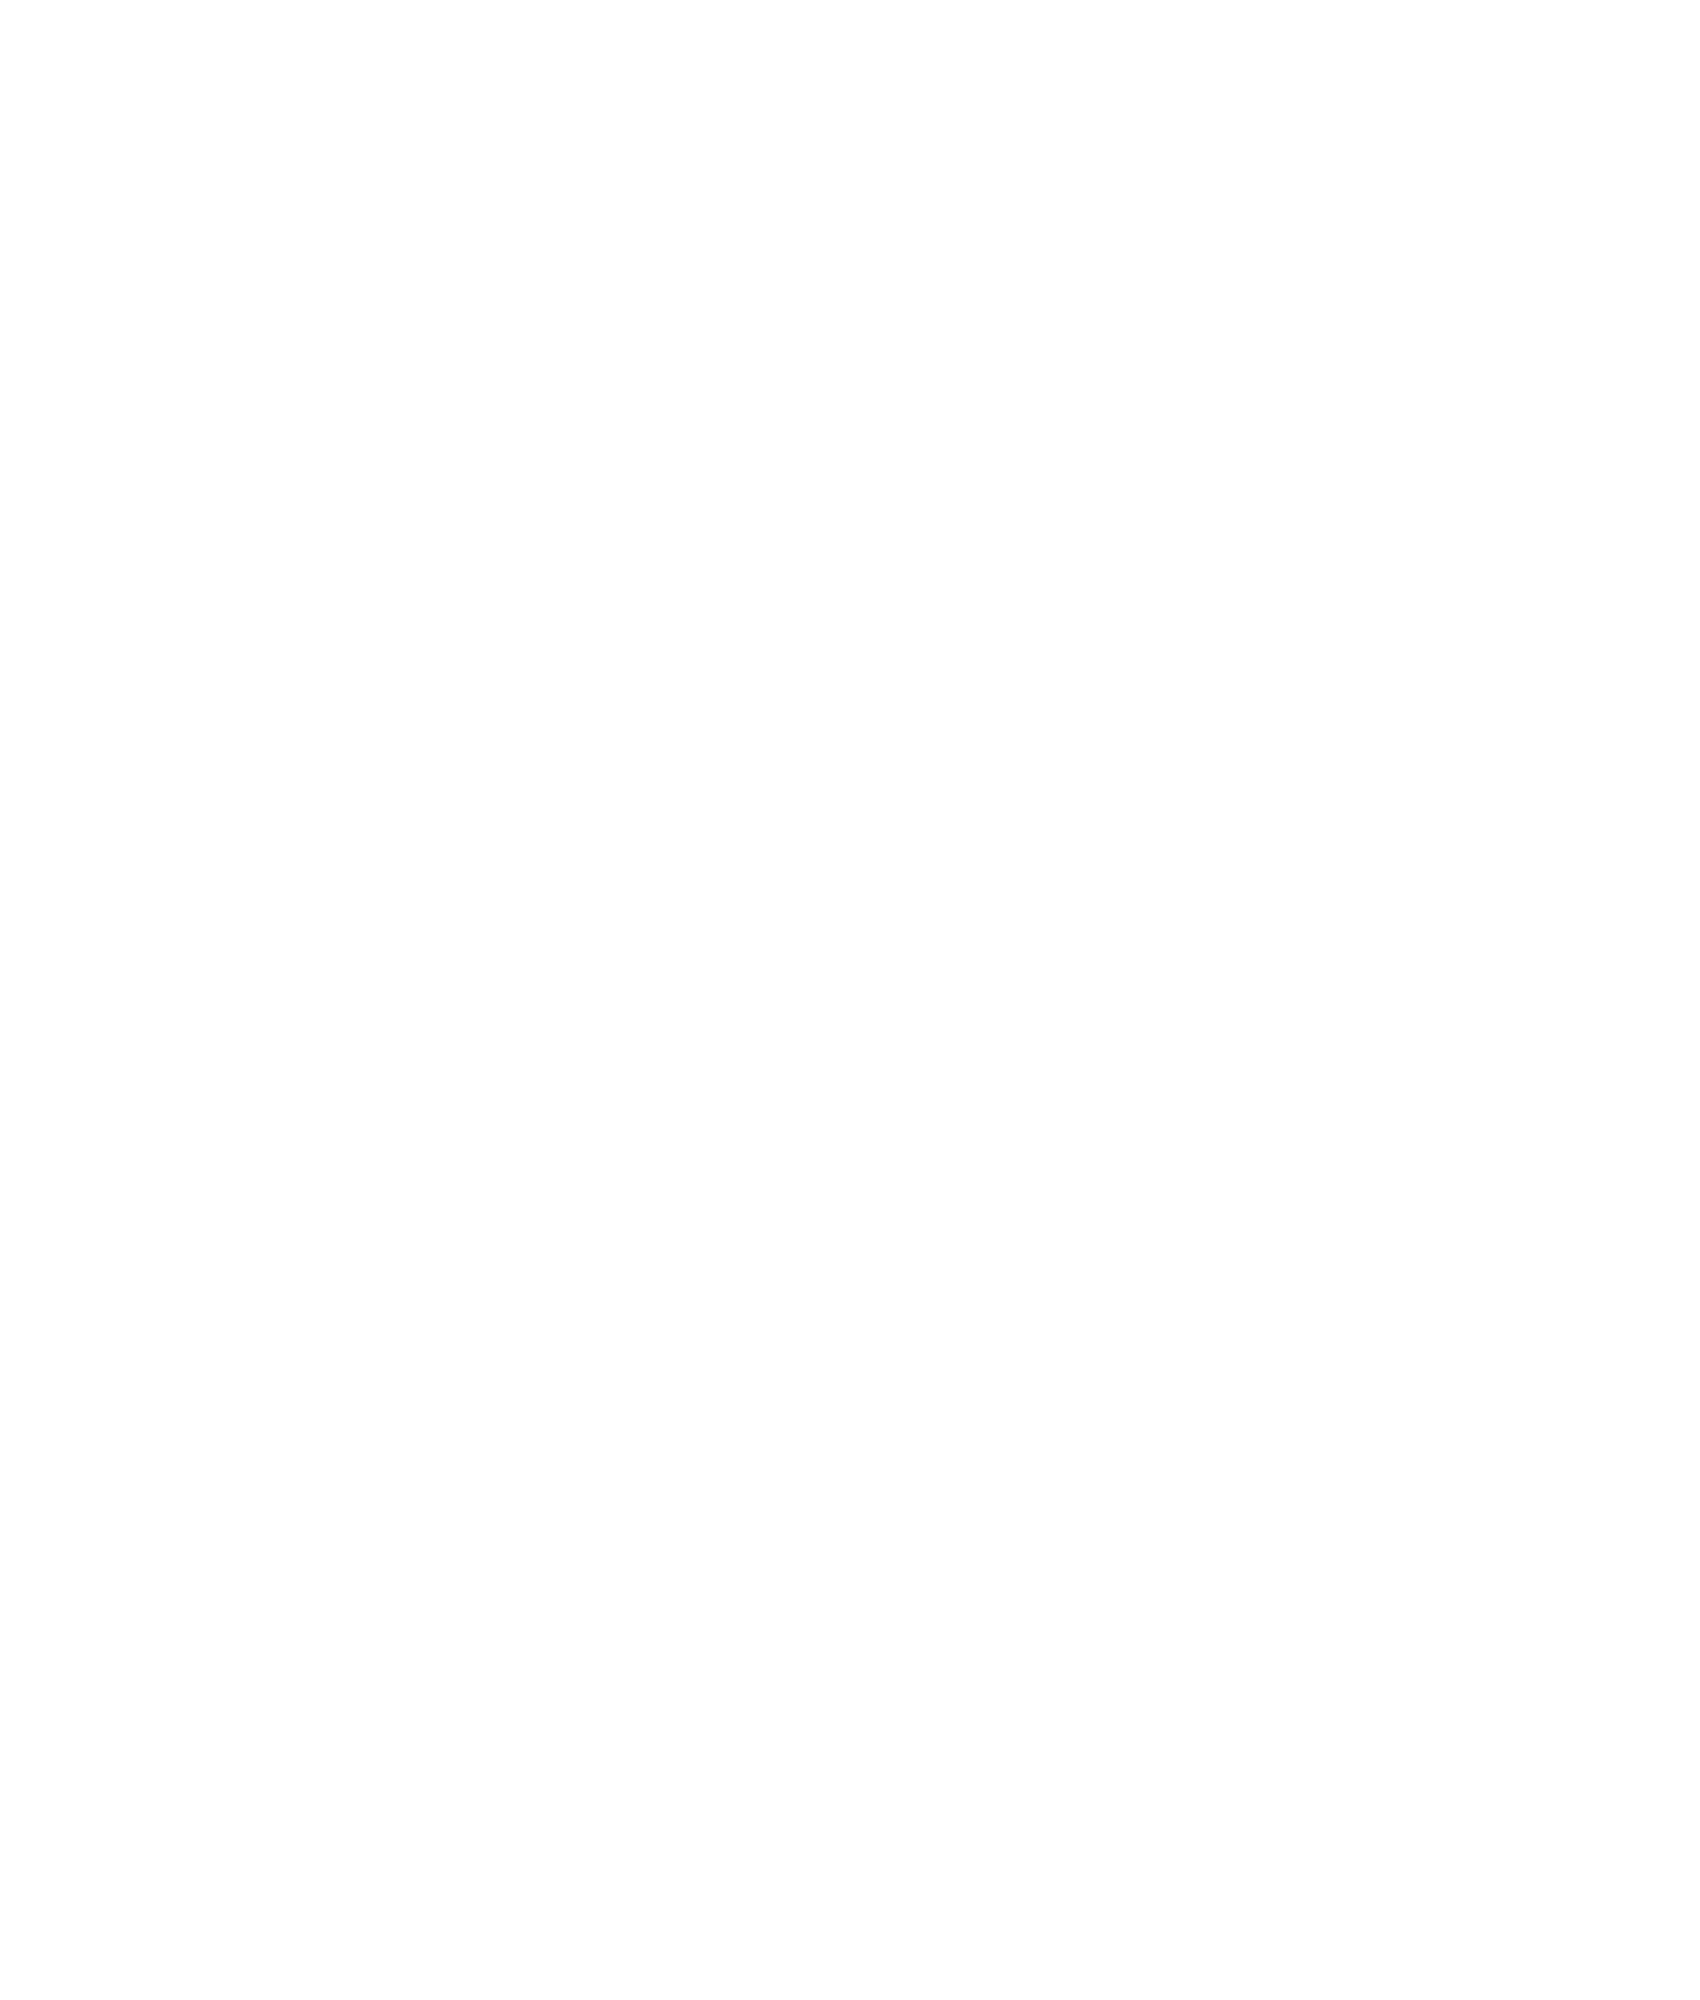

Text(0.5, 0.98, 'MMS 2')

In [23]:
%matplotlib notebook
f, axs = plt.subplots(7, sharex="all", figsize=(8.5, 10))
f.subplots_adjust(left=.13, right=.87, bottom=.07, top=.95, hspace=0)

plot_line(axs[0], b_gsm)
axs[0].legend(["$B_x$", "$B_y$", "$B_z$"], loc="upper right", ncol=3, frameon=True)
axs[0].set_ylabel("$B$ [nT]")

axs[1], caxs1 = plot_spectr(axs[1], dpf_feeps_omni_e, yscale="log", cscale="log")
caxs1.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[1].set_ylabel("$E_e$ [keV]")

axs[2], caxs2 = plot_spectr(axs[2], dpf_feeps_pad_e_050_100, cscale="log")
caxs2.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[2].set_ylim([0, 180])
axs[2].set_yticks([45, 90, 135])
axs[2].set_ylabel("$\\theta$ [$^{\\circ}$]")

axs[3], caxs3 = plot_spectr(axs[3], dpf_feeps_pad_e_100_200, cscale="log")
caxs3.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[3].set_ylim([0, 180])
axs[3].set_yticks([45, 90, 135])
axs[3].set_ylabel("$\\theta$ [$^{\\circ}$]")

axs[4], caxs4 = plot_spectr(axs[4], dpf_feeps_omni_i[:, 1:], yscale="log", cscale="log")
caxs4.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[4].set_ylabel("$E_i$ [keV]")

axs[5], caxs5 = plot_spectr(axs[5], dpf_feeps_pad_i_070_100, cscale="log", clim=[3e-1, 1e2])
caxs5.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[5].set_ylim([0, 180])
axs[5].set_yticks([45, 90, 135])
axs[5].set_ylabel("$\\theta$ [$^{\\circ}$]")

axs[6], caxs6 = plot_spectr(axs[6], dpf_feeps_pad_i_100_200, cscale="log")
caxs6.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[6].set_ylim([0, 180])
axs[6].set_yticks([45, 90, 135])
axs[6].set_ylabel("$\\theta$ [$^{\\circ}$]")

f.align_ylabels(axs)
f.suptitle(f"MMS {mms_id:d}")

### Spin average omni-directional differential particle flux and pitch angle distributions

In [24]:
help(mms.feeps_spin_avg)

Help on function feeps_spin_avg in module pyrfu.mms.feeps_spin_avg:

feeps_spin_avg(flux_omni, spin_sectors)
    spin-average the omni-directional FEEPS energy spectra
    
    Parameters
    ----------
    flux_omni : xarray.DataArray
        Omni-direction flux.
    spin_sectors : xarray.DataArray
        Time series of the spin sectors.
    
    Returns
    -------
    spin_avg_flux : xarray.DataArray
        Spin averaged omni-directional flux.



In [25]:
# Electron
dpf_feeps_omni_e_spin = mms.feeps_spin_avg(dpf_feeps_omni_e, dpf_feeps_alle_e.spinsectnum)

# Ion
dpf_feeps_omni_i_spin = mms.feeps_spin_avg(dpf_feeps_omni_i, dpf_feeps_alle_i.spinsectnum)

In [26]:
help(mms.feeps_pad_spinavg)

Help on function feeps_pad_spinavg in module pyrfu.mms.feeps_pad_spinavg:

feeps_pad_spinavg(pad, spin_sectors, bin_size: float = 16.3636)
    Spin-average the FEEPS pitch angle distributions.
    
    Parameters
    ----------
    pad : xarray.DataArray
        Pitch angle distribution.
    spin_sectors : xarray.DataArray
        Time series of the spin sectors.
    bin_size : float, Optional
        Size of the pitch angle bins
    
    Returns
    -------
    out : xarray.DataArray
        Spin averaged pitch angle distribution.



In [27]:
# Electron
dpf_feeps_pad_e_050_100_spin = mms.feeps_pad_spinavg(dpf_feeps_pad_e_050_100, dpf_feeps_alle_e.spinsectnum)
dpf_feeps_pad_e_100_200_spin = mms.feeps_pad_spinavg(dpf_feeps_pad_e_100_200, dpf_feeps_alle_e.spinsectnum)

# Ion
dpf_feeps_pad_i_070_100_spin = mms.feeps_pad_spinavg(dpf_feeps_pad_i_070_100, dpf_feeps_alle_i.spinsectnum)
dpf_feeps_pad_i_100_200_spin = mms.feeps_pad_spinavg(dpf_feeps_pad_i_100_200, dpf_feeps_alle_i.spinsectnum)

### Plot

<IPython.core.display.Javascript object>


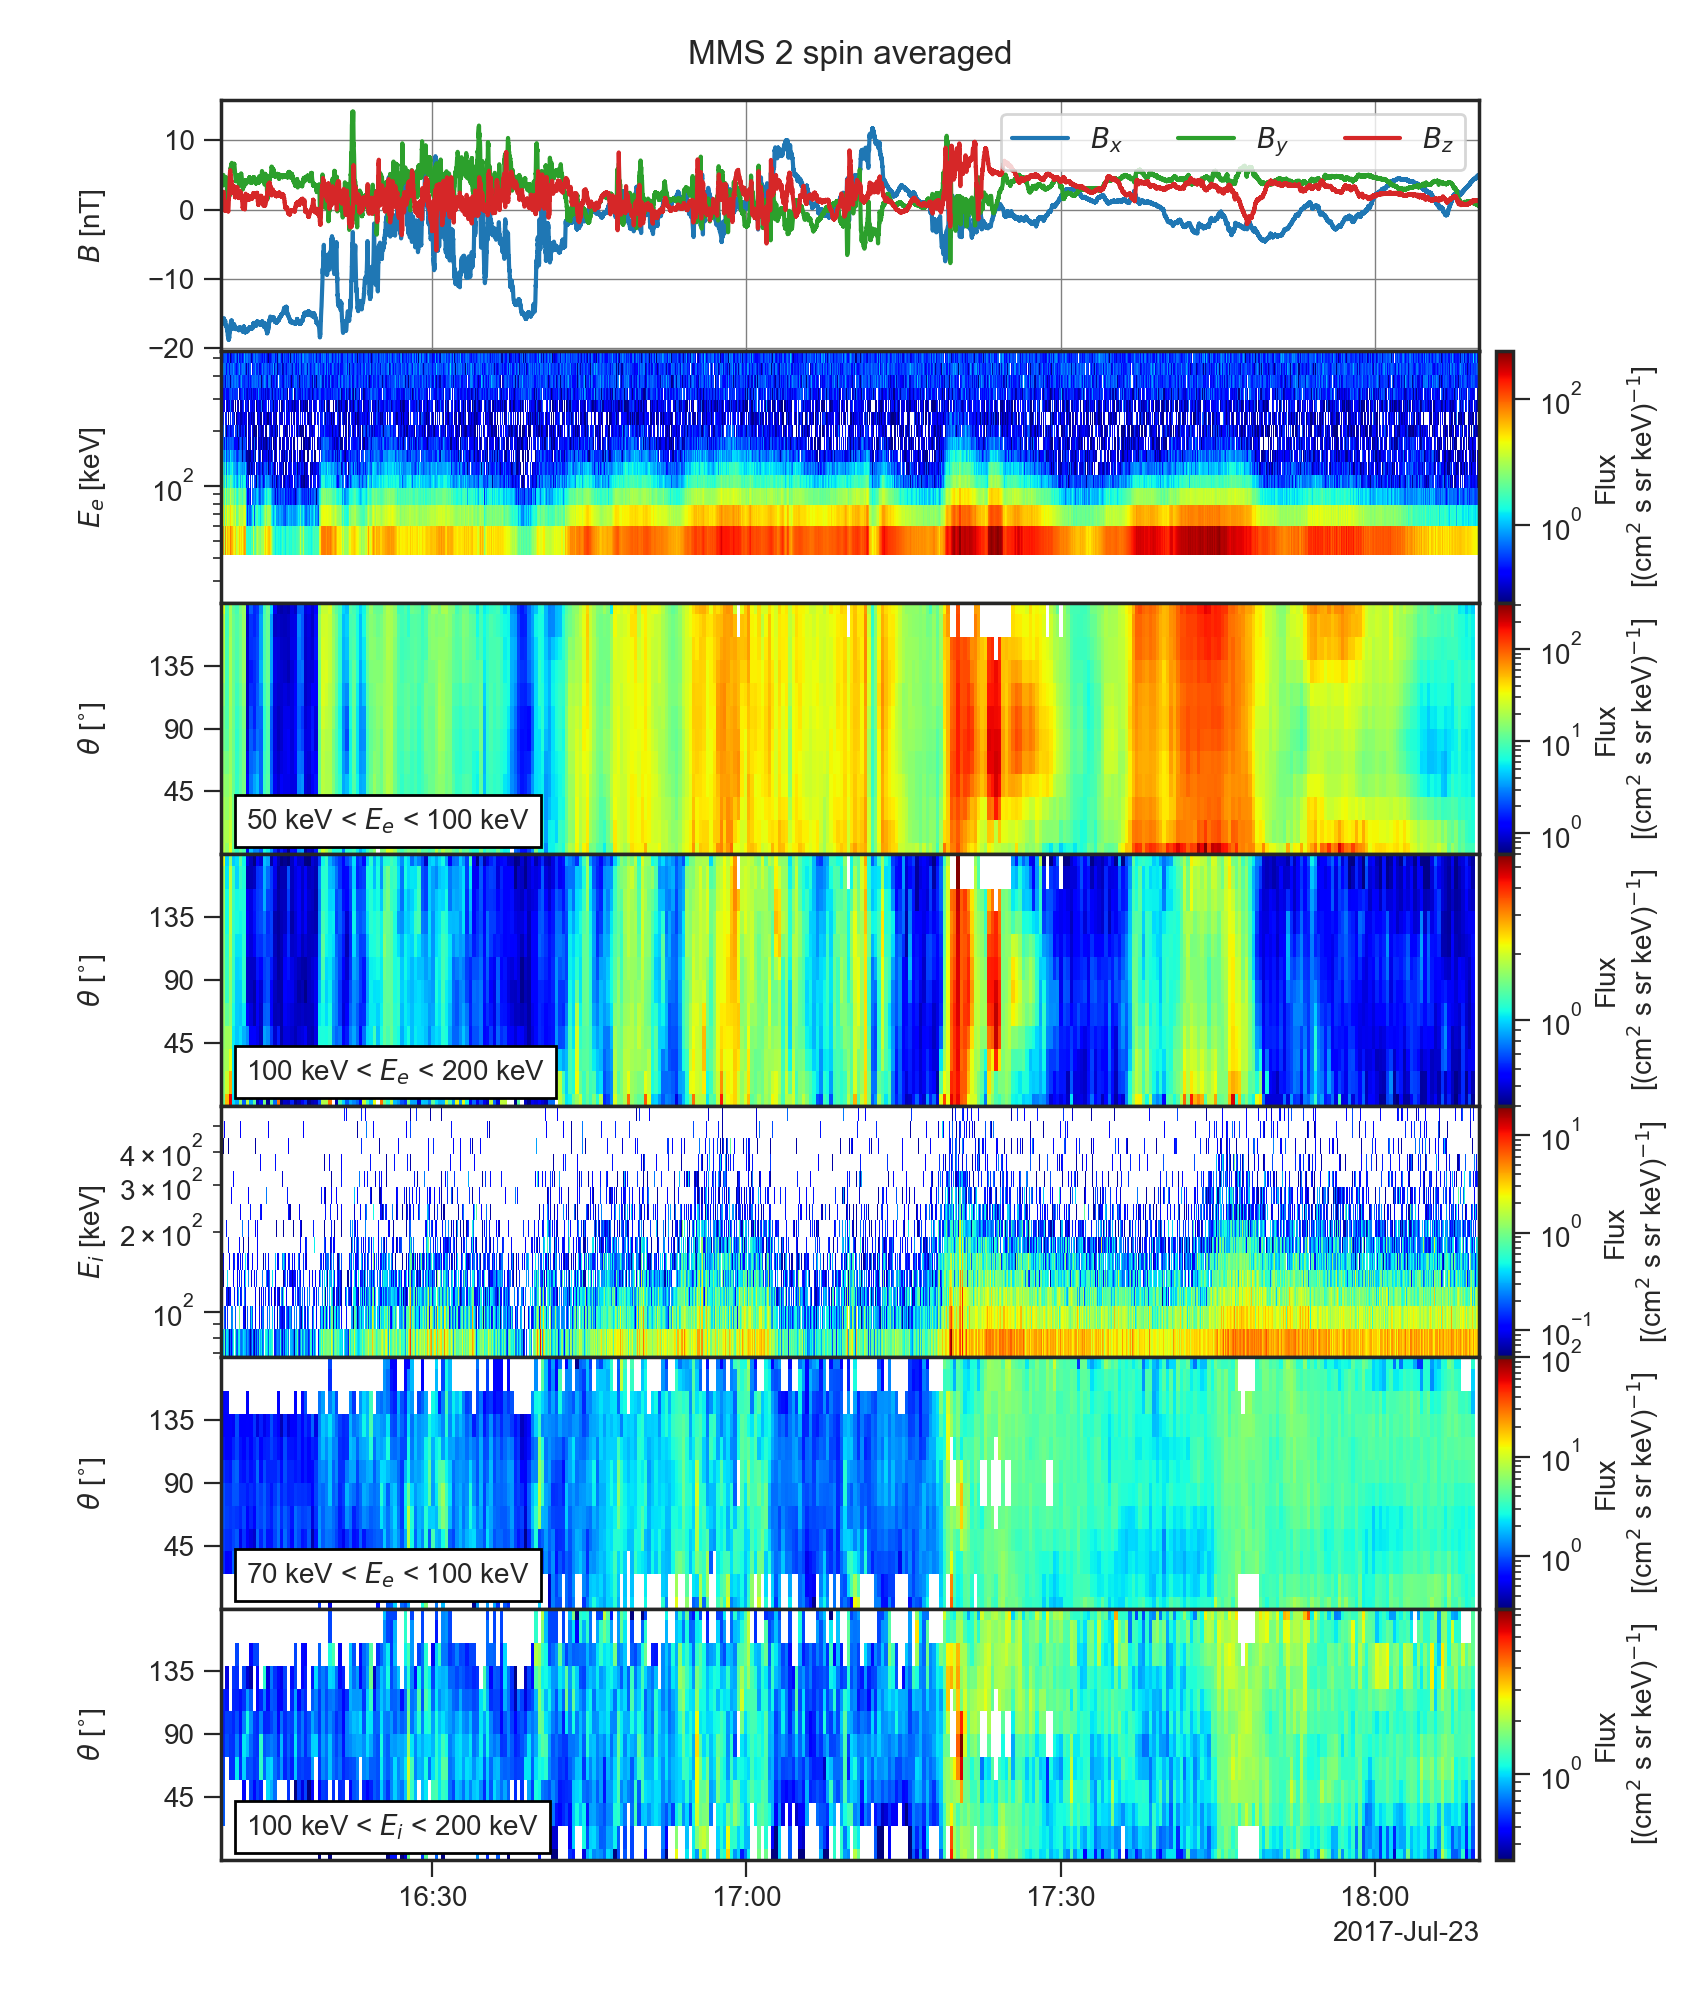

Text(0.5, 0.98, 'MMS 2 spin averaged')

In [34]:
%matplotlib notebook
f, axs = plt.subplots(7, sharex="all", figsize=(8.5, 10))
f.subplots_adjust(left=.13, right=.87, bottom=.07, top=.95, hspace=0)

plot_line(axs[0], b_gsm)
axs[0].legend(["$B_x$", "$B_y$", "$B_z$"], loc="upper right", ncol=3, frameon=True)
axs[0].set_ylabel("$B$ [nT]")

axs[1], caxs1 = plot_spectr(axs[1], dpf_feeps_omni_e_spin, yscale="log", cscale="log")
caxs1.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[1].set_ylabel("$E_e$ [keV]")

axs[2], caxs2 = plot_spectr(axs[2], dpf_feeps_pad_e_050_100_spin, cscale="log")
caxs2.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[2].set_ylim([0, 180])
axs[2].set_yticks([45, 90, 135])
axs[2].set_ylabel("$\\theta$ [$^{\\circ}$]")
axs[2].text(.02, .1, "50 keV < $E_e$ < 100 keV", 
            bbox=dict(fc=(1, 1, 1)), transform=axs[2].transAxes)

axs[3], caxs3 = plot_spectr(axs[3], dpf_feeps_pad_e_100_200_spin, cscale="log")
caxs3.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[3].set_ylim([0, 180])
axs[3].set_yticks([45, 90, 135])
axs[3].set_ylabel("$\\theta$ [$^{\\circ}$]")
axs[3].text(.02, .1, "100 keV < $E_e$ < 200 keV", 
            bbox=dict(fc=(1, 1, 1)), transform=axs[3].transAxes)

axs[4], caxs4 = plot_spectr(axs[4], dpf_feeps_omni_i_spin[:, 1:], yscale="log", cscale="log")
caxs4.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[4].set_ylabel("$E_i$ [keV]")

axs[5], caxs5 = plot_spectr(axs[5], dpf_feeps_pad_i_070_100_spin, cscale="log", clim=[3e-1, 1e2])
caxs5.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[5].set_ylim([0, 180])
axs[5].set_yticks([45, 90, 135])
axs[5].set_ylabel("$\\theta$ [$^{\\circ}$]")
axs[5].text(.02, .1, "70 keV < $E_e$ < 100 keV", 
            bbox=dict(fc=(1, 1, 1)), transform=axs[5].transAxes)

axs[6], caxs6 = plot_spectr(axs[6], dpf_feeps_pad_i_100_200_spin, cscale="log")
caxs6.set_ylabel("Flux" + "\n" + "[(cm$^2$ s sr keV)$^{-1}$]")
axs[6].set_ylim([0, 180])
axs[6].set_yticks([45, 90, 135])
axs[6].set_ylabel("$\\theta$ [$^{\\circ}$]")
axs[6].text(.02, .1, "100 keV < $E_i$ < 200 keV", 
            bbox=dict(fc=(1, 1, 1)), transform=axs[6].transAxes)

f.align_ylabels(axs)
f.suptitle(f"MMS {mms_id:d} spin averaged")